In [1]:
import numpy as np
import pylab as plt
import lal
import pycbc.psd

In [2]:
# The color of the noise matches a PSD which you provide
flow = 30
delta_f = 1.0 / 16
flen = int(4096 / delta_f) + 1
#psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

In [3]:
data = np.loadtxt('hybrid.txt')
psd= np.loadtxt('psd.txt')

In [4]:
print(psd[0])

[9.00000000e+00 1.73707227e-21]


In [5]:
time=[]
hreal=[]
himag=[]
phase=[]
amp=[]
for i in range(0,len(data)):
    time.append(data[i][0])
    hreal.append(data[i][1])
    himag.append(data[i][2])
    phase.append(data[i][3])
    amp.append(data[i][4])
time=np.array(time)
hreal=np.array(hreal)
himag=np.array(himag)
phase=np.array(phase)
amp=np.array(amp)

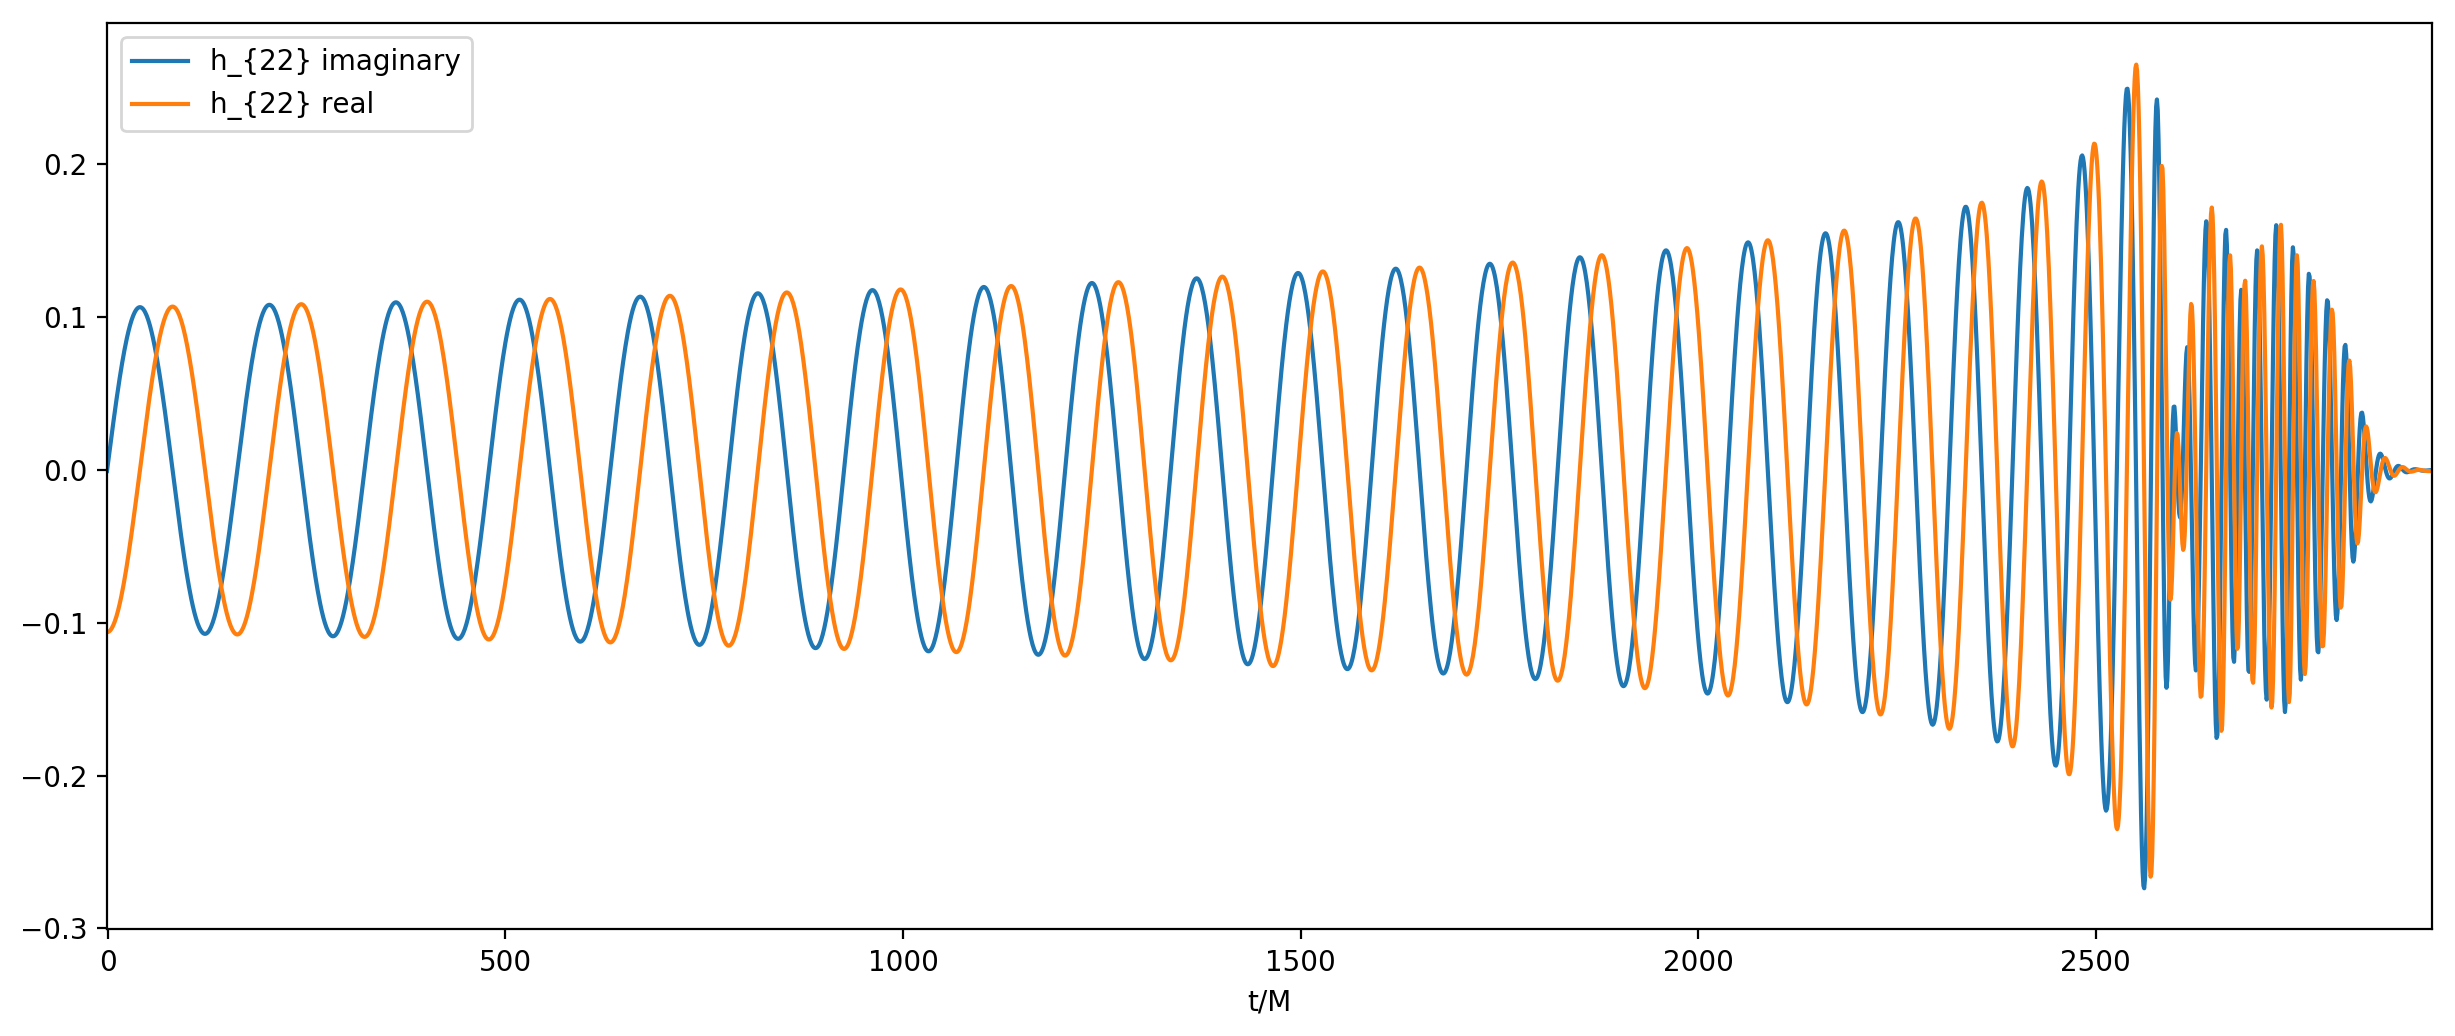

In [6]:
plt.figure(figsize=[15, 6], dpi=200)
plt.plot(time,himag,label='h_{22} imaginary')
plt.plot(time,hreal,label='h_{22} real')
plt.xlim([-1,time[-1]])
plt.xlabel('t/M')
plt.legend()
plt.show()

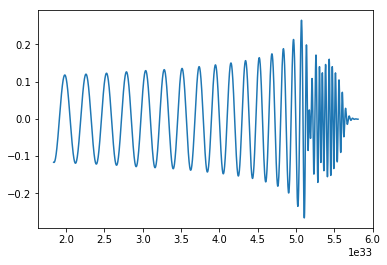

In [7]:
msolar = 1.98847*10**30
tcut = time[-2000:-1]*msolar
plt.plot(tcut,hreal[-2000:-1])


In [26]:
h_pm = hreal[-100000:-1]-1j*himag[-100000:-1]
h_pm_fft = np.fft.fft(h_pm)
timestep = 0.1
freq = np.fft.fftfreq(len(h_pm))*40000
#freq_shift=np.fft.fftfreq(len(h_pm))*40000*(1.0+.1)

#h_shift = (1+(1)*np.heaviside(freq-1000,1))*h_pm_fft#*np.exp(-2*np.pi*1j)#*freq**1.5)
#h_shift = 2*(1+np.arctan(freq-1000)/(np.pi))*h_pm_fft
#h_shift = (1+20*np.exp(-(freq-2200)**2/(2*10000))-.9*np.exp(-(freq-1900)**2/(2*30000)))*h_pm_fft#*np.exp(2*np.pi*1j*3000)

In [30]:
print(freq)
#freq-freq.fill(2000.0)
heavar=freq.fill(2000.0)
print(heavar.type)
print(np.heaviside(freq-heavar,.5))
freq_shift=freq+np.heaviside(freq-2000)*np.power((freq-2000)*.1,2.0)
print(freq_shift)
time_stretch=np.fft.ifft(freq_shift)

[2000. 2000. 2000. ... 2000. 2000. 2000.]


AttributeError: 'NoneType' object has no attribute 'type'

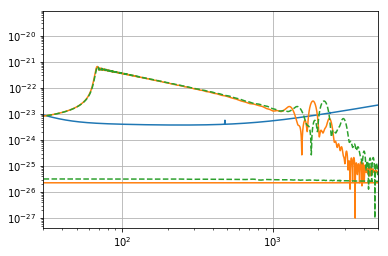

In [13]:
#plt.loglog(psd.get_sample_frequencies(),psd**0.5)
plt.loglog(psd[:,0],psd[:,1])#**0.5)
plt.loglog(freq,abs(h_pm_fft)/10**24)
plt.loglog(freq_shift,abs(h_pm_fft)/10**24,'--')
plt.xlim(30,5000)
plt.grid()
#plt.xlim([flow,psd.get_sample_frequencies()[-1]+500])

#plt.ylim([10**(-27),2*10**(-21)])

In [ ]:
np.heaviside(1000,100)